# Text processing with an RNN  
  
In order to get the RNN to consume text data, we need two things:  
  
1. A list of all the texts, eg `texts = ['Today is a nice day', 'Yesterday was gorgeous',....]`  
2. We need the labels in a list too, eg `labels = [1, 0, 1, 1,...]`.  If labels are text string categories, then use one-hot encoding to convert them into an array, with each row of the array corresponding to an observation.  
  
We first set up a tokenizer as follows:  
  
```python
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences  
  
tokenizer = Tokenizer(num_words = vocab_size) #Sets up a blank tokenizer  
tokenizer.fit_on_texts(texts)   
# fit_on_texts creates the vocabulary based on `texts`, based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).  
  
sequences = tokenizer.texts_to_sequences(texts)  
# This step transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.   
  
word_index = tokenizer.word_index # This is the dictionary of words and their indexes which one can see using  word_index.items()  
  
data = pad_sequences(sequences, maxlen = maxlen) # Here we make all texts equal in length, and padding is pre (can be changed   by padding='post')  
  
labels = np.asarray(labels) # We convert the labels into an array from its original list form.  

```  
  
At this point all our input text data exists as perfectly sized tensors in the variable called `data`, and `labels`.  The `data` variable has references to the `word_index` which is essentially the dictionary for the task.  
  
Next, we need to create the embeddings_matrix based on Glove.  For this, we first load up Glove in a giant matrix, and then we look up each item in the `word_index` in the Glove matrix and create our pre-trained embeddings_matrix based on Glove.  In this matrix, we preserve the index order as in the `word_index`, so what is #3 in the word index is also the 3rd row in the embeddings_matrix.  The 0th row is all zeros, and only the first row onwards are used because in the `word_index` dictionary there is no entry for zero.  
  
Now we are good to go to feed this into our NN. The pretrained embeddings_matrix makes its way into the NN using the following commands:  
  
```python
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
```
  
  

In [1]:
import pandas as pd
import joblib
df = joblib.load('final_df3.pkl')
df.columns

Index(['title', 'summary_x', 'URL', 'keywords', 'summary_y', 'text',
       'published_date', 'corona'],
      dtype='object')

In [2]:
texts = list(df.text)

In [3]:
import pandas as pd

In [ ]:
texts

In [5]:
# labels = (np.random.randint(0,2,970))
labels = df.corona

In [6]:
import os
os.getcwd()

'C:\\Users\\user'

In [2]:
# import os
# imdb_dir = '\\Users\\user\\aclImdb'
# train_dir = os.path.join(imdb_dir, 'train')
# labels=[]
# texts=[]



In [3]:
# Read all the text files
# for label_type in ['neg','pos']:
#     dir_name = os.path.join(train_dir, label_type)
#     for fname in os.listdir(dir_name):
#         if fname[-4:]== '.txt':
#             f = open(os.path.join(dir_name, fname))
#             #print(fname)
#             texts.append(f.read())
#             f.close()
#             if label_type =='neg':
#                 labels.append(0)
#             else:
#                 labels.append(1)
            
        


At this point, the variable `texts` contains all the reviews in plaintext as a list.

Number of items in texts is 6036 
 Its stats are:
count    6036.000000
mean      563.801359
std       517.209699
min         1.000000
25%       265.000000
50%       437.000000
75%       762.000000
max      7244.000000
dtype: float64
-----
Number of labels count is 6036


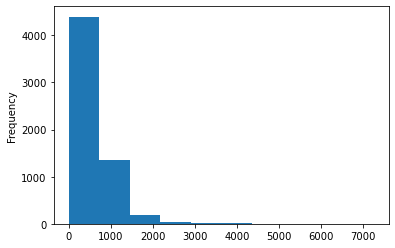

In [7]:
print('Number of items in texts is', len(texts), '\n Its stats are:')
print(pd.Series([len(texts[i].split(' ')) for i in range(len(texts))]).describe())
pd.Series([len(texts[i].split(' ')) for i in range(len(texts))]).plot.hist()
print('-----')
print('Number of labels count is', len(labels))

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen=5000  # how many words to take from each text
training_samples=int(len(texts) * 0.8)
validation_samples = len(texts) - training_samples
vocab_size=20000

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))
data = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(labels)
print('Shape of data tensor', data.shape)
print('Shape of label tensor', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]



Found 74822 unique tokens
Shape of data tensor (6036, 5000)
Shape of label tensor (6036,)


In [9]:
int(79.2)

79

In [12]:
len(data)

6036

In [13]:
glove_dir = '\\Users\\user\\glove.6B'

embeddings_index = {}
#f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
f=open('\\Users\\user\\glove.6B\\glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s words and corresponding vectors' % len(embeddings_index))

Found 400000 words and corresponding vectors


In [14]:
len(embeddings_index.get('security'))

100

In [15]:
print(embeddings_index.get('th13e'))

None


In [16]:
# Create the embedding matrix based on Glove
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            

In [17]:
embedding_matrix.shape

(20000, 100)

At this point the `embedding_matrix` has one row per word in the vocabulary.  Each row has the vector for that word, picked from glove.  Because it is an np.array, it has no row or column names. The order of the words in the rows is the same as the order of words in the dict word_index.  
  
We will feed this embedding matrix as weights to the embedding layer.  
  
## Build the model  

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN


In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # Note that vocab_size=10000 (vocab size), embedding_dim = 100 (100 dense vector for each word from Glove), maxlen=100 (using only first 100 words of each review)
model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,017,057
Trainable params: 2,017,057
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

Train on 3862 samples, validate on 966 samples
Epoch 1/15
3862/3862 [==============================] - 335s 87ms/step - loss: 0.5318 - acc: 0.7740 - val_loss: 0.5191 - val_acc: 0.7961
Epoch 2/15
3862/3862 [==============================] - 328s 85ms/step - loss: 0.5180 - acc: 0.7869 - val_loss: 0.5153 - val_acc: 0.7961
Epoch 3/15
3862/3862 [==============================] - 316s 82ms/step - loss: 0.5147 - acc: 0.7869 - val_loss: 0.5237 - val_acc: 0.7961
Epoch 4/15
3862/3862 [==============================] - 283s 73ms/step - loss: 0.5137 - acc: 0.7869 - val_loss: 0.5163 - val_acc: 0.7961
Epoch 5/15
3862/3862 [==============================] - 279s 72ms/step - loss: 0.5106 - acc: 0.7869 - val_loss: 0.5150 - val_acc: 0.7961
Epoch 6/15
3862/3862 [==============================] - 274s 71ms/step - loss: 0.5090 - acc: 0.7872 - val_loss: 0.5226 - val_acc: 0.7961
Epoch 7/15
3862/3862 [==============================] - 278s 72ms/step - loss: 0.5068 - acc: 0.7872 - val_loss: 0.5215 - val_acc: 0